# Problem Statement:
### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset :- https://github.com/Prodigy-InfoTech/data-science-datasets/tree/main/Task%202

## Import the neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the required Data Sets

In [2]:
gender_submission_df = pd.read_csv('gender_submission.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

## Explore the datasets

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# Display the column name of each dataset

print('Gender Submission:' ,gender_submission_df.columns, "\n")
print('Train data', train_df.columns, "\n")
print('Test data', test_df.columns, "\n")

Gender Submission: Index(['PassengerId', 'Survived'], dtype='object') 

Train data Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test data Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



## Data Cleaning

In [7]:
# Ensure correct column names are being used
print("Train Data Columns:\n")
print(train_df.columns, "\n")

print("Test Data Columns:\n")
print(test_df.columns, "\n")

Train Data Columns:

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test Data Columns:

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



### We will handle the missing values for the Age, Embarked, and Fare columns and proceed with the Exploratory Data Analysis (EDA).

In [8]:
# For 'train_df', handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# For 'test_df', handle missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Verify that there are no more missing values
print("Missing values in Train Data after cleaning:")
print(train_df.isnull().sum(), "\n")

print("Missing values in Test Data after cleaning:")
print(test_df.isnull().sum(), "\n")

Missing values in Train Data after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

Missing values in Test Data after cleaning:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64 



C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_21464\2679876791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_21464\2679876791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

### Exploratory Data Analysis (EDA)

In [9]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

### Survival rate

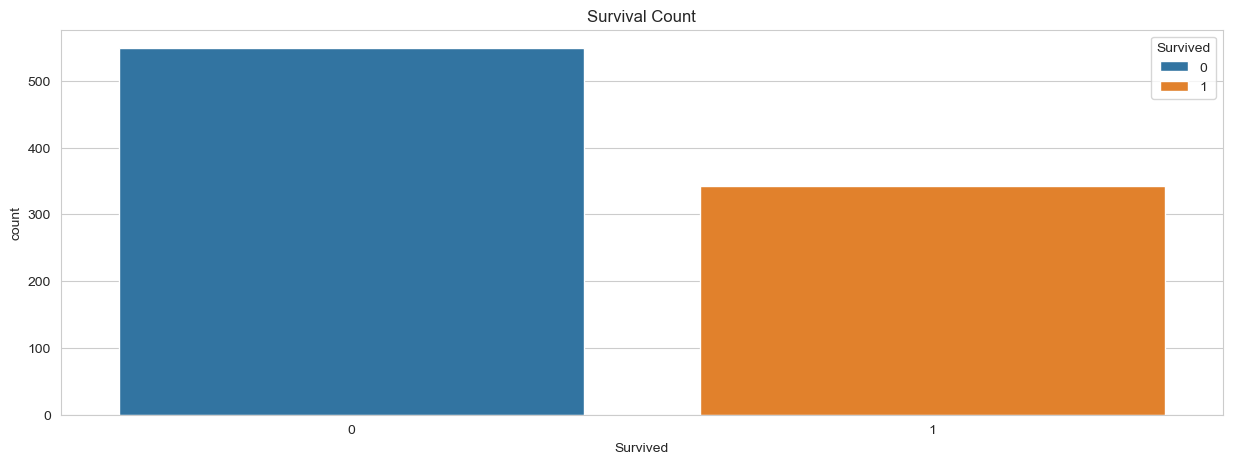

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Survived', hue="Survived" , data=train_df)
plt.title('Survival Count')
plt.show()

### Passenger class distribution

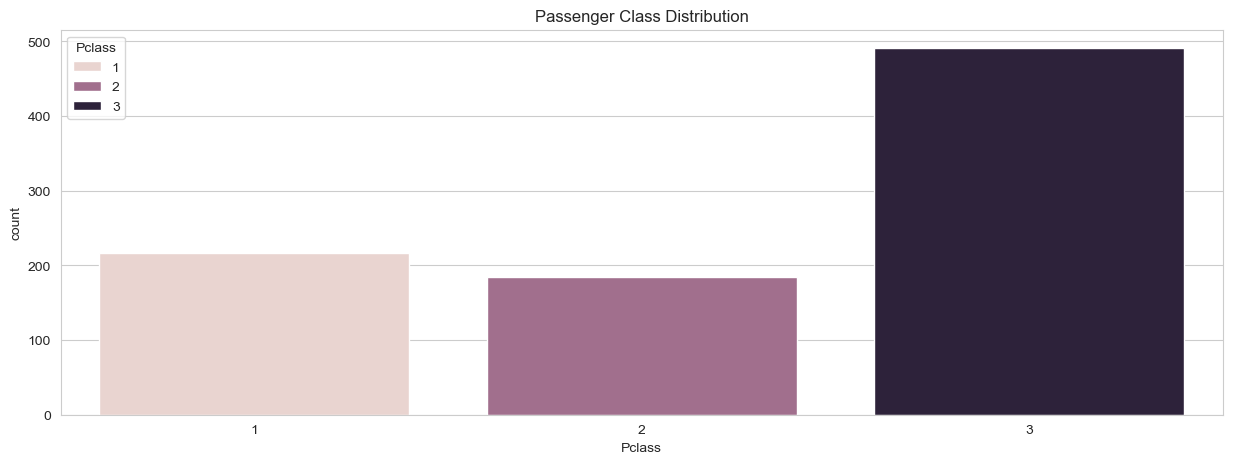

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Pclass', hue="Pclass" , data=train_df)
plt.title('Passenger Class Distribution')
plt.show()

### Age distribution

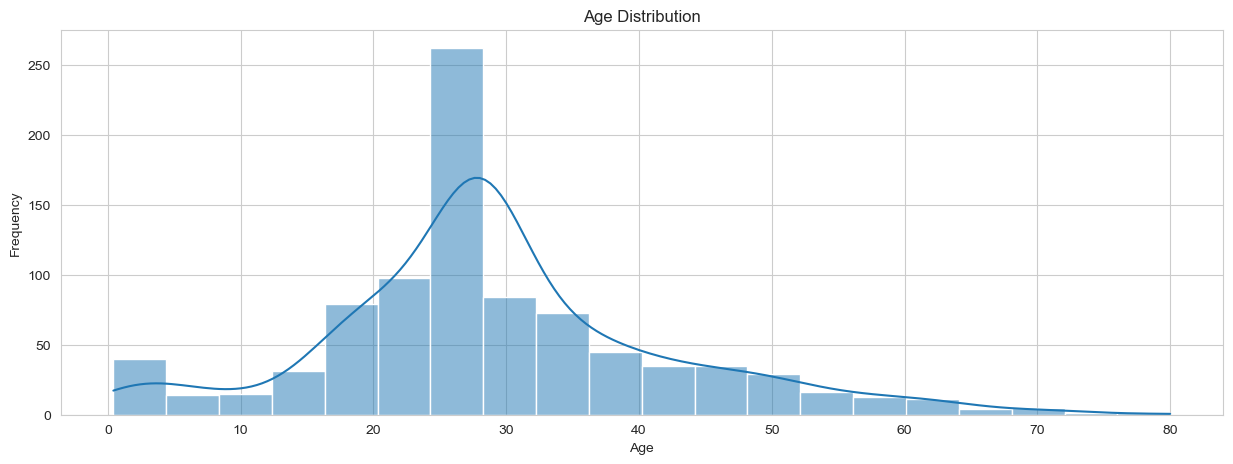

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Gender Distrubution

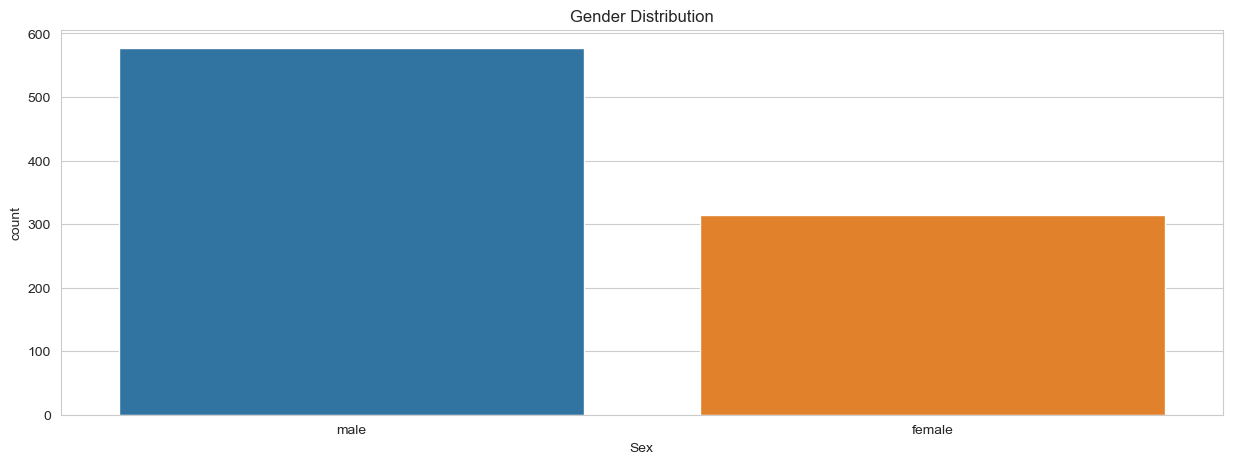

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Sex', hue="Sex" , data=train_df)
plt.title('Gender Distribution')
plt.show()

### Embarked port distribution

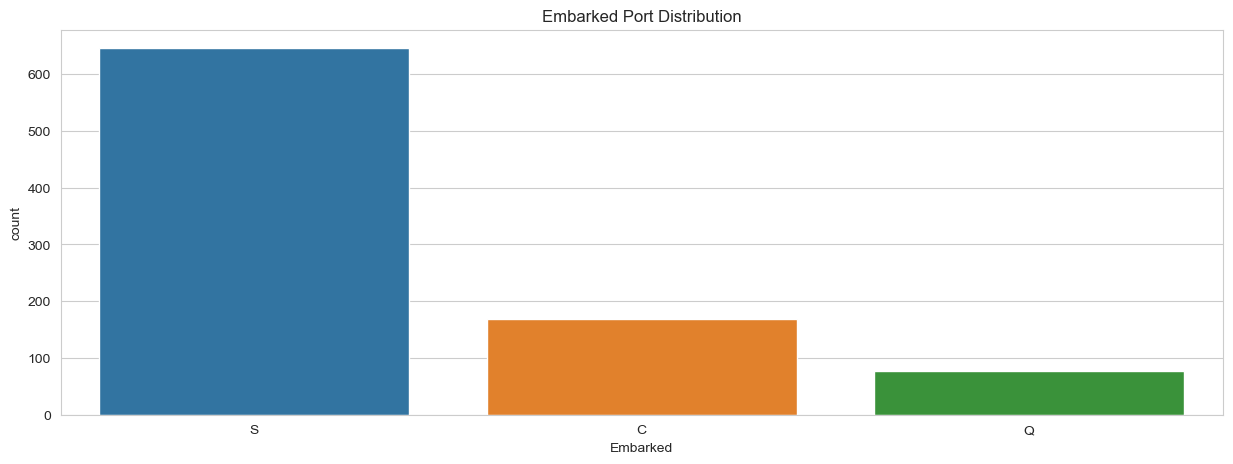

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Embarked', hue='Embarked', data=train_df)
plt.title('Embarked Port Distribution')
plt.show()

### Survival rate by passenger class

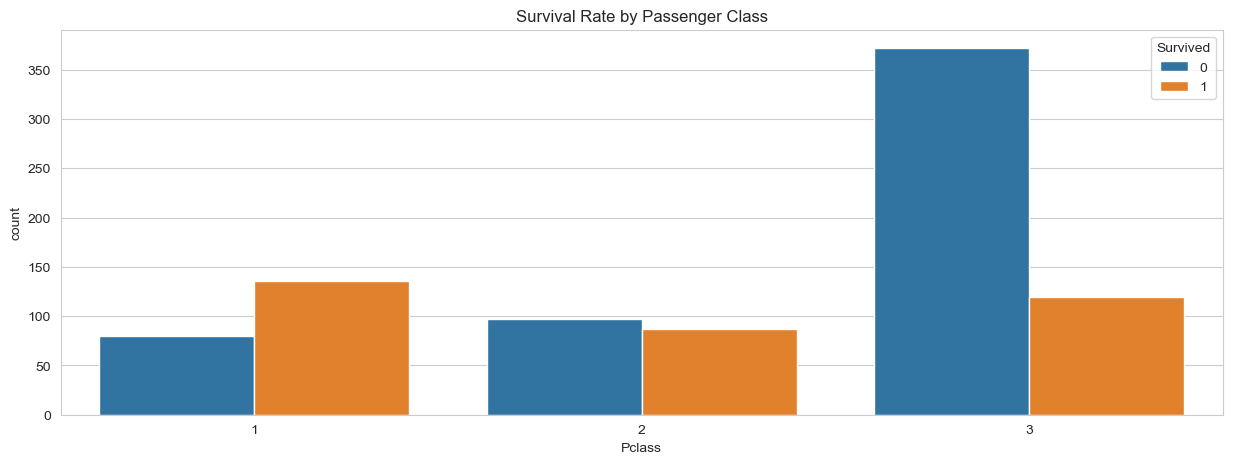

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

### Survival rate by gender

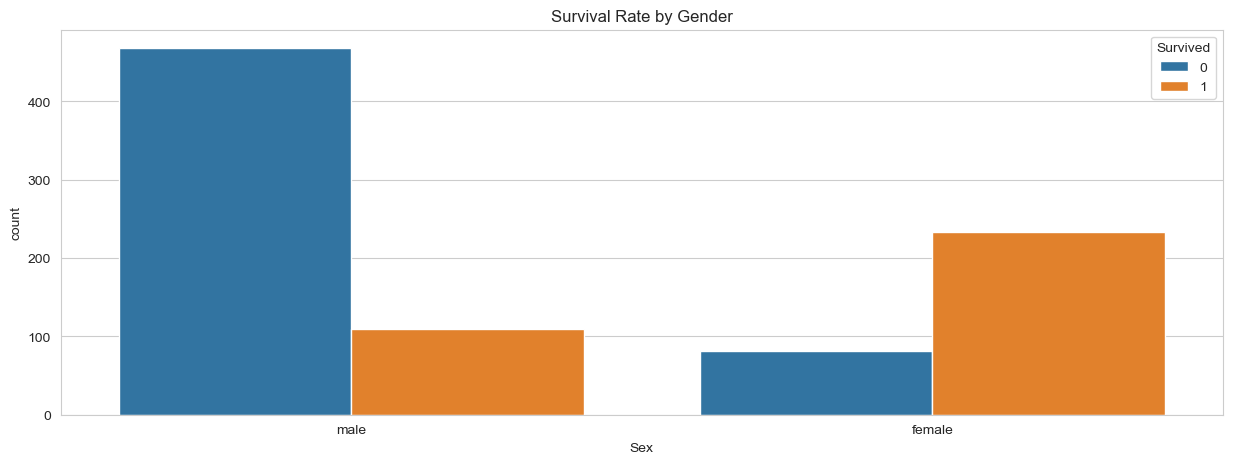

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

### Survival rate by age

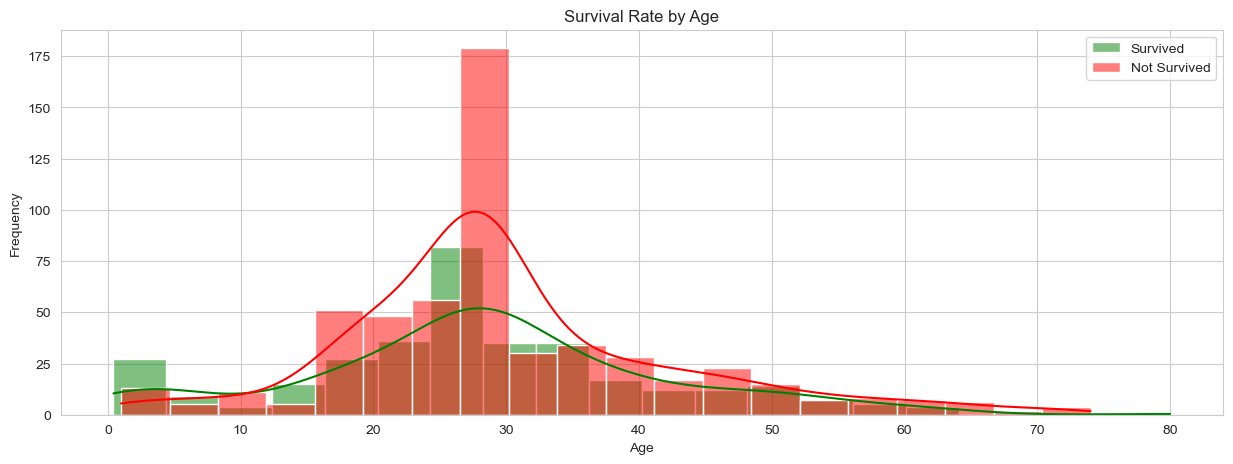

In [17]:
plt.figure(figsize=(15, 5))
sns.histplot(train_df[train_df['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(train_df[train_df['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()